In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.autograd import Variable

In [ ]:
dff = pd.read_csv('drive/MyDrive/Datasets/EVChargingDemand/Demand.csv')
dff

,ObjectId2,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,0
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,1
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,2
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,3
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148131,148132,BOULDER / N BOULDER REC 1,3172 Broadway,Boulder,Colorado,80304,11/30/2023 19:58,MST,11/30/2023 20:10,MST,0:12:13,0:11:42,1.194,0.848,0.150,Level 2,77937
148132,148133,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:00,MST,11/30/2023 20:01,MST,0:01:07,0:00:00,0.000,0.000,0.000,Level 2,77938
148133,148134,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:01,MST,11/30/2023 20:21,MST,0:19:52,0:19:43,1.899,1.349,0.238,Level 2,77939
148134,148135,BOULDER / REC CENTER ST2,1360 Gillaspie Dr,Boulder,Colorado,80305,11/30/2023 21:03,MST,11/30/2023 21:31,MST,0:28:08,0:27:50,1.499,1.064,0.188,Level 2,77940


In [ ]:
# dff.head()
dff["Start_Date"] = pd.to_datetime(dff['Start_Date___Time'], format='mixed')
dff['Charging_Time(h)'] = pd.to_timedelta(dff["Charging_Time__hh_mm_ss_"]) / np.timedelta64(1, 'h')
dff['dayOfWeek'] = dff['Start_Date'].dt.day_name()
dff['Profile'] = dff['Energy__kWh_'] / dff['Charging_Time(h)']
dff.head()

,ObjectId2,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,...,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID,Start_Date,Charging_Time(h),dayOfWeek,Profile
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,...,2:02:44,6.504,2.732,0.816,Level 2,0,2018-01-01 17:49:00,2.045556,Monday,3.179576
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,...,0:24:19,2.481,1.042,0.311,Level 2,1,2018-01-02 08:52:00,0.405278,Tuesday,6.121727
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,...,3:40:52,15.046,6.319,1.888,Level 2,2,2018-01-02 21:11:00,3.681111,Tuesday,4.087353
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,...,1:54:29,6.947,2.918,0.872,Level 2,3,2018-01-03 09:19:00,1.908056,Wednesday,3.640879
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,...,0:16:44,1.800,0.756,0.226,Level 2,4,2018-01-03 14:13:00,0.278889,Wednesday,6.454183


In [ ]:
profile = dff.groupby([dff['Start_Date'].dt.date])['Profile'].sum()

In [ ]:
print(profile)

Start_Date
2018-01-01      6.359153
2018-01-02     20.418160
2018-01-03     32.616012
2018-01-04     48.338232
2018-01-05     10.555980
                 ...    
2023-11-26    230.978056
2023-11-27    317.530641
2023-11-28    331.647852
2023-11-29    312.383063
2023-11-30    307.759418
Name: Profile, Length: 2156, dtype: float64


In [ ]:
daily1 = pd.read_csv('drive/MyDrive/Datasets/EVChargingDemand/BoulderDailyData.csv')
monthly = pd.read_csv('drive/MyDrive/Datasets/EVChargingDemand/BoulderMonthlyDate.csv')

In [ ]:
daily1.interpolate(method='linear', inplace=True)
monthly.interpolate(method='linear', inplace=True)

In [ ]:
daily1["Date"] = pd.to_datetime(daily1['Date']).dt.date
monthly["Date"] = pd.to_datetime(monthly['Date']).dt.date

<ipython-input-23-b2f1ac81eb6b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily1["Date"] = pd.to_datetime(daily1['Date']).dt.date


In [ ]:
monthly

,Date,MaxTemp,MinTemp,Percipitation,Snow
0,2018-01-01,51.9,23.5,0.74,8.8
1,2018-02-01,46.0,19.0,1.04,18.5
2,2018-03-01,57.9,28.8,2.23,6.8
3,2018-04-01,64.7,33.5,1.35,6.0
4,2018-05-01,73.5,45.9,4.76,0.0
...,...,...,...,...,...
67,2023-08-01,86.8,57.0,2.12,0.0
68,2023-09-01,81.1,49.6,2.32,0.0
69,2023-10-01,66.4,36.7,0.63,6.8
70,2023-11-01,58.5,30.7,0.49,7.3


In [ ]:
daily = daily1.set_index('Date')
daily

,MaxTemp,MinTemp,Percipitation,Snow
Date,,,,
2018-01-01,30,12.0,0.0,0.0
2018-01-02,46,12.0,0.0,0.0
2018-01-03,50,20.0,0.0,0.0
2018-01-04,52,24.0,0.0,0.0
2018-01-05,62,25.0,0.0,0.0
...,...,...,...,...
2023-11-26,38,12.0,0.0,0.0
2023-11-27,43,15.0,0.0,0.0
2023-11-28,53,24.0,0.0,0.0


In [ ]:
daily1['Date']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
2155    2023-11-26
2156    2023-11-27
2157    2023-11-28
2158    2023-11-29
2159    2023-11-30
Name: Date, Length: 2160, dtype: object

In [ ]:
day = dff.groupby(dff['Start_Date'].dt.date)['dayOfWeek'].min()

In [ ]:
weekend = {'Saturday': 1, 'Sunday': 1, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0}
# weekday = {'Saturday': 1, 'Sunday': 1, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0}

In [ ]:
df = pd.DataFrame({'Day': day, 'Profile(kW)': profile, 'MinTemp': daily['MinTemp'], 'MaxTemp': daily['MaxTemp'], 'Percipitation': daily['Percipitation'], 'Snow': daily['Snow']})
df.dropna(inplace=True)
df['date'] = daily1['Date']
df['Weekend'] = df['Day'].apply(lambda x: weekend[x])
df.drop(columns='date', inplace=True)
df
# df.to_csv('drive/MyDrive/Datasets/EVChargingDemand/BoulderProfile.csv')

,Day,Profile(kW),MinTemp,MaxTemp,Percipitation,Snow,Weekend
2018-01-01,Monday,6.359153,12.0,30,0.0,0.0,0
2018-01-02,Tuesday,20.418160,12.0,46,0.0,0.0,0
2018-01-03,Wednesday,32.616012,20.0,50,0.0,0.0,0
2018-01-04,Thursday,48.338232,24.0,52,0.0,0.0,0
2018-01-05,Friday,10.555980,25.0,62,0.0,0.0,0
...,...,...,...,...,...,...,...
2023-11-26,Sunday,230.978056,12.0,38,0.0,0.0,1
2023-11-27,Monday,317.530641,15.0,43,0.0,0.0,0
2023-11-28,Tuesday,331.647852,24.0,53,0.0,0.0,0
2023-11-29,Wednesday,312.383063,23.0,52,0.0,0.0,0


<ipython-input-30-bbe03b557ac3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Profile(kW)', y='Day', inner='box', palette='Dark2')


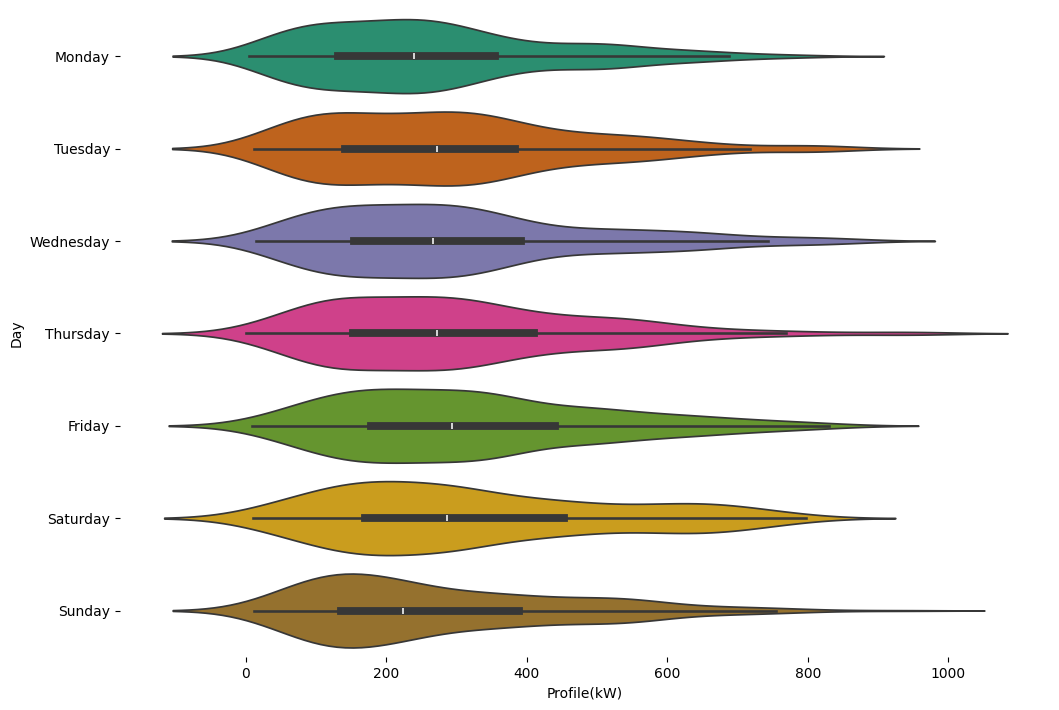

In [ ]:
# @title Day vs Profile(kW)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Profile(kW)', y='Day', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

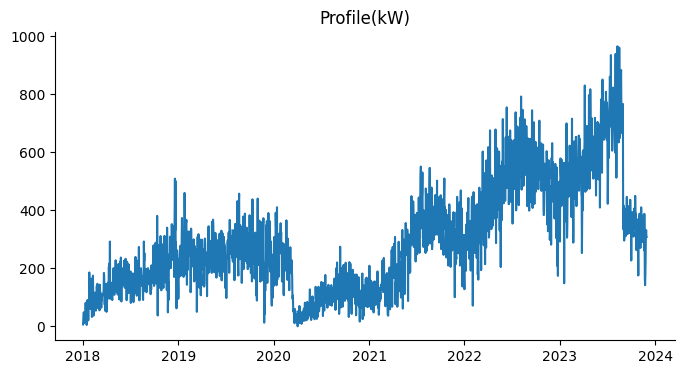

In [ ]:
# @title Profile(kW)

from matplotlib import pyplot as plt
df['Profile(kW)'].plot(kind='line', figsize=(8, 4), title='Profile(kW)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.drop(columns='Day', inplace=True)

In [ ]:
target = ['Profile(kW)']
features = ['Weekend', 'MaxTemp', 'MinTemp', 'Percipitation', 'Snow']

def split_train_test(df, sequence_length, test_portion, val_portion, steps_ahead):
    split = int(df.shape[0] * (1 - test_portion - val_portion))
    val_split = int(df.shape[0] * (val_portion)) + split
    # split = portion
    df_train = df.iloc[:split, :].copy()
    df_val = df.iloc[split:val_split, :].copy()
    df_test = df.iloc[val_split:, :].copy()

    # scale the data

    # train_combined = np.hstack(df_train.values).reshape(-1, 1)
    # test_combined = np.hstack(df_test.values).reshape(-1, 1)
    # val_combined = np.hstack(df_val.values).reshape(-1, 1)

    # train_scaler = MinMaxScaler().fit(train_combined)
    target_scaler = MinMaxScaler().fit(df_train[target])
    # train_scaled = train_scaler.transform(train_combined).reshape(-1, 6)
    # test_scaled = train_scaler.transform(test_combined).reshape(-1, 6)
    # val_scaled = train_scaler.transform(val_combined).reshape(-1, 6)

    # df_train = pd.DataFrame(train_scaled, columns=target+features)
    # df_test = pd.DataFrame(test_scaled, columns=target+features)
    # df_val = pd.DataFrame(val_scaled, columns=target+features)


    df_train[target] = target_scaler.transform(df_train[target])
    df_val[target] = target_scaler.transform(df_val[target])
    df_test[target] = target_scaler.transform(df_test[target])

    feature_scaler = MinMaxScaler().fit(df_train[features])
    df_train[features] = feature_scaler.transform(df_train[features])
    df_val[features] = feature_scaler.transform(df_val[features])
    df_test[features] = feature_scaler.transform(df_test[features])

    # extract the input sequences and output values

    X_train, y_train = [], []

    for i in range(sequence_length, df_train.shape[0] - steps_ahead + 1):
        X_train.append(df_train[features + target].iloc[i - sequence_length: i])
        y_train.append(df_train[target].iloc[i:i + steps_ahead])

    X_train, y_train = np.array(X_train), np.array(y_train)
    y_train.squeeze()

    X_val, y_val = [], []

    for i in range(sequence_length, df_val.shape[0] - steps_ahead + 1):
        X_val.append(df_val[features + target].iloc[i - sequence_length: i])
        y_val.append(df_val[target].iloc[i:i + steps_ahead])

    X_val, y_val = np.array(X_val), np.array(y_val)
    y_val.squeeze()

    X_test, y_test = [], []

    for i in range(sequence_length, df_test.shape[0] - steps_ahead + 1):
        X_test.append(df_test[features + target].iloc[i - sequence_length: i])
        y_test.append(df_test[target].iloc[i:i + steps_ahead])

    X_test, y_test = np.array(X_test), np.array(y_test)
    y_test.squeeze()

    print(X_train.shape)
    # (138, 30, 4)

    print(y_train.shape)
    # (55, 30, 4)

    return X_train, y_train, X_val, y_val, X_test, y_test, target_scaler

In [ ]:
sequence_length = 30
steps_ahead = 7
batch_size = 8
X1_train, y1_train, X1_val, y1_val, X1_test, y1_test, target_scaler1 = split_train_test(df, sequence_length, 0.2, 0.1001, steps_ahead)

(1472, 30, 6)
(1472, 7, 1)


In [ ]:
X1_train = X1_train.reshape(-1, batch_size, sequence_length, len(features+target),)
# X1_test = X1_test.reshape(25, 17, 7, 6,)
# X2_test = X2_test.reshape(25, 17, 7, 6,)
y1_train = y1_train.reshape(-1, batch_size, steps_ahead,)
# y1_test = y1_test.reshape(25, 17, 1)
# y2_test = y2_test.reshape(25, 17, 1)

In [ ]:
# Convert to PyTorch tensors
X1_train = torch.FloatTensor(X1_train)#.unsqueeze(-1)
X1_test = torch.FloatTensor(X1_test)#.unsqueeze(-1)
X1_val = torch.FloatTensor(X1_val)#.unsqueeze(-1)
y1_val = torch.FloatTensor(y1_val).squeeze()
y1_train = torch.FloatTensor(y1_train).squeeze()
y1_test = torch.FloatTensor(y1_test).squeeze()

print(X1_test.shape)

torch.Size([397, 30, 6])


# Noisy RNN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from copy import deepcopy

def gaussian_init_(n_units, std=1):
    sampler = torch.distributions.Normal(torch.Tensor([0]), torch.Tensor([std/n_units]))
    A_init = sampler.sample((n_units, n_units))[..., 0]
    return A_init

class NRNNModel(nn.Module):
    def __init__(self, input_dim, output_classes, n_units=128, eps=0.01,
                 beta=0.8, gamma_A=0.01, gamma_W=0.01, init_std=1, alpha=1,
                 solver='noisy', add_noise=0.05, mult_noise=0.02):
        super(NRNNModel, self).__init__()

        # self.device = get_device()


        self.n_units = n_units
        self.eps = eps
        self.solver = solver
        self.beta = beta
        self.alpha = alpha
        self.gamma_A = gamma_A
        self.gamma_W = gamma_W
        self.add_noise = add_noise
        self.mult_noise = mult_noise

        self.tanh = nn.Tanh()

        self.E = nn.Linear(input_dim, n_units)
        self.D = nn.Linear(n_units, output_classes)

        self.C = nn.Parameter(gaussian_init_(n_units, std=init_std))
        self.B = nn.Parameter(gaussian_init_(n_units, std=init_std))
        self.I = torch.eye(n_units)#.to(self.device)

        self.d = nn.Parameter(torch.rand(self.n_units).float() + eps)#.to(self.device)*0 + eps)


    def forward(self, x, mode='train'):
        T = x.shape[1]
        h = torch.zeros(x.shape[0], self.n_units)#.to(which_device(self))

        for i in range(T):
            z = self.E(x[:,i,:])

            if i == 0:
                A = self.beta * (self.B - self.B.transpose(1, 0)) + (1-self.beta) * (self.B + self.B.transpose(1, 0)) - self.gamma_A * self.I
                W = self.beta * (self.C - self.C.transpose(1, 0)) + (1-self.beta) * (self.C + self.C.transpose(1, 0)) - self.gamma_W * self.I


            add_noise = 0.0
            mult_noise = 1.0
            if mode == 'train':
                if self.add_noise > 0:
                    add_noise = self.add_noise * torch.randn(h.shape[0], h.shape[1]).float()#.to(self.device)

                if self.mult_noise > 0:
                    #mult_noise = self.mult_noise * torch.randn(h.shape[0], h.shape[1]).float().to(self.device) + 1
                    mult_noise = self.mult_noise * torch.rand(h.shape[0], h.shape[1]).float() + (1-self.mult_noise)#.to(self.device) + (1-self.mult_noise)


            if self.solver == 'base':
                h_update = self.alpha * torch.matmul(h, A) + self.tanh(torch.matmul(h, W) + z)
                h = h + self.eps * h_update
            elif self.solver == 'noisy':
                h_update = self.alpha * torch.matmul(h, A) + self.tanh(torch.matmul(h, W) + z)
                h = h + self.d * mult_noise * h_update + add_noise


        # Decoder
        #----------
        out = self.D(h)
        return out


In [ ]:
input_dim = len(features+target)  # Number of features
hidden_dim = 128  # Number of hidden layers
num_layers = 2  # Number of RNN layers
output_dim = steps_ahead  # Number of output layers

model1 = NRNNModel(input_dim, output_dim, n_units=hidden_dim, add_noise=0.01, mult_noise=0.02, solver='noisy')

In [ ]:
### Visualization
import matplotlib.pyplot as plt
epoch_loss1 = []
criterion = torch.nn.MSELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
# Training loop
best_val_loss = float('inf')
patience = 20  # Number of epochs to wait before early stopping
counter = 0  # Counter for the number of epochs since the last improvement
best_model_path = 'best_model.pth'

num_epochs = 100
for epoch in range(num_epochs + 1):
    for batch in range(X1_train.shape[0]):
        model1.train()
        # model2.train()
        optimizer1.zero_grad()
        # optimizer2.zero_grad()
        outputs1 = model1(X1_train[batch])
        # outputs2 = model2(X2_train[batch])
        loss1 = criterion(outputs1, y1_train[batch])#.unsqueeze(-1))
        # loss2 = criterion(outputs2, y2_train[batch])#.unsqueeze(-1))
        loss1.backward()
        optimizer1.step()
        # loss2.backward()
        # optimizer2.step()
    epoch_loss1.append(loss1.item())

    model1.eval()
    with torch.no_grad():
        val_loss = criterion(model1(X1_val), y1_val)

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model1.state_dict(), best_model_path)
    # else:
    #     counter += 1
    #     if counter >= patience:
    #         print(f'Early stopping after {epoch+1} epochs.')
    #         break

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss1.item():.4f}, Val Loss: {val_loss.item():.4f}')

    # epoch_loss2.append(loss2.item())
    # if epoch % 10 == 0:
    #     print(f'Epoch {epoch}, Loss1: {loss1.item()}')#, Loss2: {loss2.item()}')


Epoch [10/100], Train Loss: 0.0145, Val Loss: 0.1298
Epoch [20/100], Train Loss: 0.0140, Val Loss: 0.0623
Epoch [30/100], Train Loss: 0.0112, Val Loss: 0.0439
Epoch [40/100], Train Loss: 0.0116, Val Loss: 0.0402
Epoch [50/100], Train Loss: 0.0126, Val Loss: 0.0335
Epoch [60/100], Train Loss: 0.0116, Val Loss: 0.0318
Epoch [70/100], Train Loss: 0.0115, Val Loss: 0.0402
Epoch [80/100], Train Loss: 0.0110, Val Loss: 0.0404
Epoch [90/100], Train Loss: 0.0100, Val Loss: 0.0456
Epoch [100/100], Train Loss: 0.0090, Val Loss: 0.0477


In [ ]:
def sliding_window(data, window_size):
    slided_data = []
    for i in range(len(data)):
        if i < window_size - 1:
            slided_data.append(data[i])
        else:
            slided = np.average(data[i - window_size + 1:i+1])
            slided_data.append(slided)
    return slided_data

e1 = sliding_window(epoch_loss1, 10)

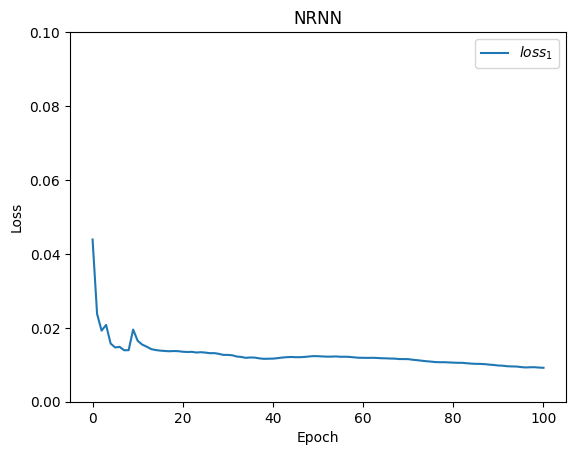

In [ ]:
plt.plot(e1)
plt.ylim(0, 0.1)
plt.legend(['$loss_1$'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("NRNN")
plt.show()

In [ ]:
model1.load_state_dict(torch.load(best_model_path))

# Make predictions on the test set
model1.eval()
predictions1 = model1(X1_test)
predictions1 = predictions1.data.numpy()
# predictions1 = scaler.inverse_transform(predictions1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming 'predictions' are already scaled back to the original range
# and 'y_test' is the actual values for the test set, also in the original scale
# Convert 'y_test' back to numpy if it's a tensor
y1_test_numpy = y1_test.squeeze().data.numpy()

# print(y1_test.squeeze().shape)
# print(y_test_numpy.shape)
# print(predictions1)
# y_test_inverse = scaler.inverse_transform(y_test_numpy.reshape(-1, 1))

# Calculate MSE and RMSE
mse1 = mean_squared_error(y1_test_numpy, predictions1)
mae1 = mean_absolute_error(y1_test_numpy, predictions1)
rmse1 = sqrt(mse1)

print(f'Mean Absolute Error (MAE1): {mae1}')
print(f'Mean Squared Error (MSE1): {mse1}')
print(f'Root Mean Squared Error (RMSE1): {rmse1}')

Mean Absolute Error (MAE1): 0.15747137367725372
Mean Squared Error (MSE1): 0.04073448106646538
Root Mean Squared Error (RMSE1): 0.20182785007640888


In [ ]:
train_size = int(df.shape[0] * (1 - 0.2))
predictions = target_scaler1.inverse_transform(predictions1)

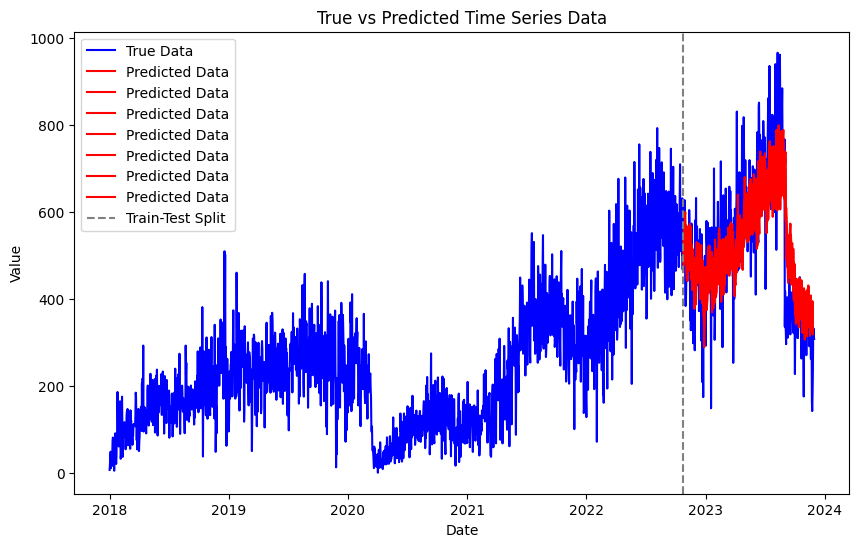

In [ ]:
plt.figure(figsize=(10,6))

# Plot true data (full dataset)
plt.plot(df.index, df[target], label='True Data', color='blue')

# Plot predicted data (only the test set)
test_range = range(train_size + sequence_length + 1, train_size + sequence_length + 1 + len(predictions))
plt.plot(df.index[test_range], predictions, label='Predicted Data', color='red')

# Add a vertical line to separate training and test sets
plt.axvline(x=df.index[train_size + sequence_length], color='gray', linestyle='--', label='Train-Test Split')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('True vs Predicted Time Series Data')
plt.legend()

# Show the plot
plt.show()

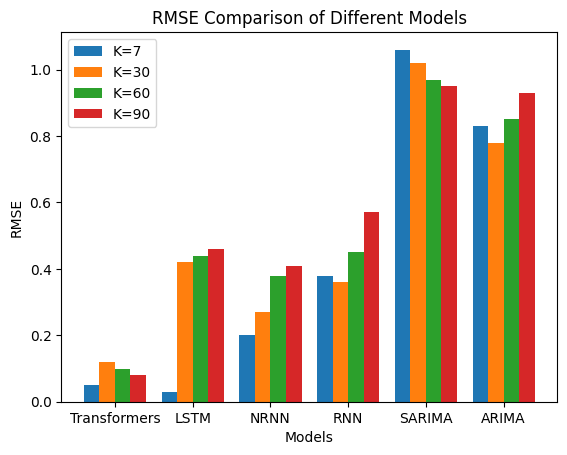

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Transformers', 'LSTM', 'NRNN', 'RNN', 'SARIMA', 'ARIMA']
k_values = ['K=7', 'K=30', 'K=60', 'K=90']
rmse_values = {
    'Transformers': [0.05, 0.12, 0.1, 0.08],
    'LSTM': [0.03, 0.42, 0.44, 0.46],
    'NRNN': [0.20, 0.27, 0.38, 0.41],
    'RNN': [0.38, 0.36, 0.45, 0.57],
    'SARIMA': [1.06, 1.02, 0.97, 0.95],
    'ARIMA': [0.83, 0.78, 0.85, 0.93]
}

# Number of categories
n_categories = len(categories)
n_k_values = len(k_values)

# Positions of the bars on the x-axis
bar_width = 0.2
bar_positions = np.arange(n_categories)

# Create the bar plot
fig, ax = plt.subplots()

for i, k in enumerate(k_values):
    values = [rmse_values[cat][i] for cat in categories]
    ax.bar(bar_positions + i * bar_width, values, bar_width, label=k)

# Adding labels
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('RMSE Comparison of Different Models')
ax.set_xticks(bar_positions + bar_width * (n_k_values / 2 - 0.5))
ax.set_xticklabels(categories)
ax.legend()

plt.show()

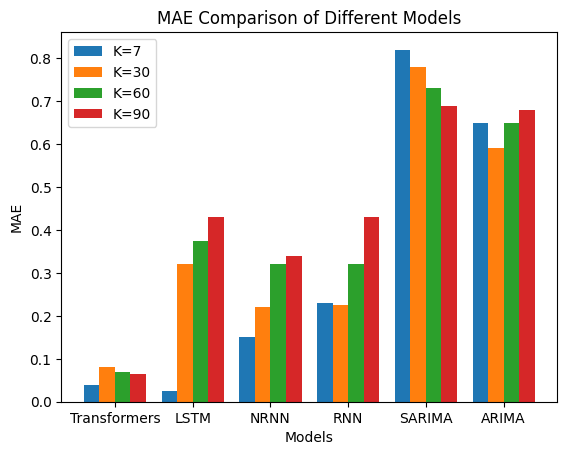

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Transformers', 'LSTM', 'NRNN', 'RNN', 'SARIMA', 'ARIMA']
k_values = ['K=7', 'K=30', 'K=60', 'K=90']
rmse_values = {
    'Transformers': [0.04, 0.08, 0.07, 0.065],
    'LSTM': [0.025, 0.32, 0.375, 0.43],
    'NRNN': [0.15, 0.22, 0.32, 0.34],
    'RNN': [0.23, 0.225, 0.32, 0.43],
    'SARIMA': [0.82, 0.78, 0.73, 0.69],
    'ARIMA': [0.65, 0.59, 0.65, 0.68]
}

# Number of categories
n_categories = len(categories)
n_k_values = len(k_values)

# Positions of the bars on the x-axis
bar_width = 0.2
bar_positions = np.arange(n_categories)

# Create the bar plot
fig, ax = plt.subplots()

for i, k in enumerate(k_values):
    values = [rmse_values[cat][i] for cat in categories]
    ax.bar(bar_positions + i * bar_width, values, bar_width, label=k)

# Adding labels
ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('MAE Comparison of Different Models')
ax.set_xticks(bar_positions + bar_width * (n_k_values / 2 - 0.5))
ax.set_xticklabels(categories)
ax.legend()

plt.show()